# RF Classifier 3D (basic version)

In [1]:
%matplotlib widget
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../iris.csv")
df['petal.dist'] = (df['petal.length']**2+df['petal.width']**2)**.5

In [3]:
features = ['sepal.length',
            'sepal.width',
            'petal.dist',]
labels   = 'variety'

nazvy premennych v zmysle konvencie: vstup [x] -> vystup [y]

pd.DataFrame.map(dictionary) -> zmena na ciselnu hondotu (index)

In [4]:
x = df[features]
y = df[labels]

In [5]:
dtree = RandomForestClassifier(n_estimators=200, max_depth=4, max_leaf_nodes=12)
dtree = dtree.fit(x, y)

numpy magic -> chceme jeden stlpec {pq} obsahujuci vsetky body mriezky {p} x {q}

In [6]:
dp = 20
dq = 20
dr = 20

p = np.linspace(0.9*np.min(df['sepal.length']), 
                1.1*np.max(df['sepal.length']), dp)
q = np.linspace(0.9*np.min(df['sepal.width']), 
                1.1*np.max(df['sepal.width']), dq)
r = np.linspace(0.9*np.min(df['petal.dist']), 
                1.1*np.max(df['petal.dist']), dr) #r
pq = np.zeros((len(p)*len(q)*len(r), 3))
rs = np.zeros((len(p), len(q), len(r), 3))
for i in range(len(p)):
    for j in range(len(q)):
        for k in range(len(r)):
                pq[k + len(r)*(j + i*len(q))] = [p[i], q[j], r[k]]

In [7]:
# lebo DataFrame funguje, povodny numpy.ndarray protestoval
out = dtree.predict(pd.DataFrame(pq)) 

d = {'Setosa' : 0,
     'Virginica' : 2,
     'Versicolor' : 1}
a = pd.Series(out).map(d)

c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [8]:
np.shape(out)

(8000,)

In [9]:
dtree.score(x, y)

0.98

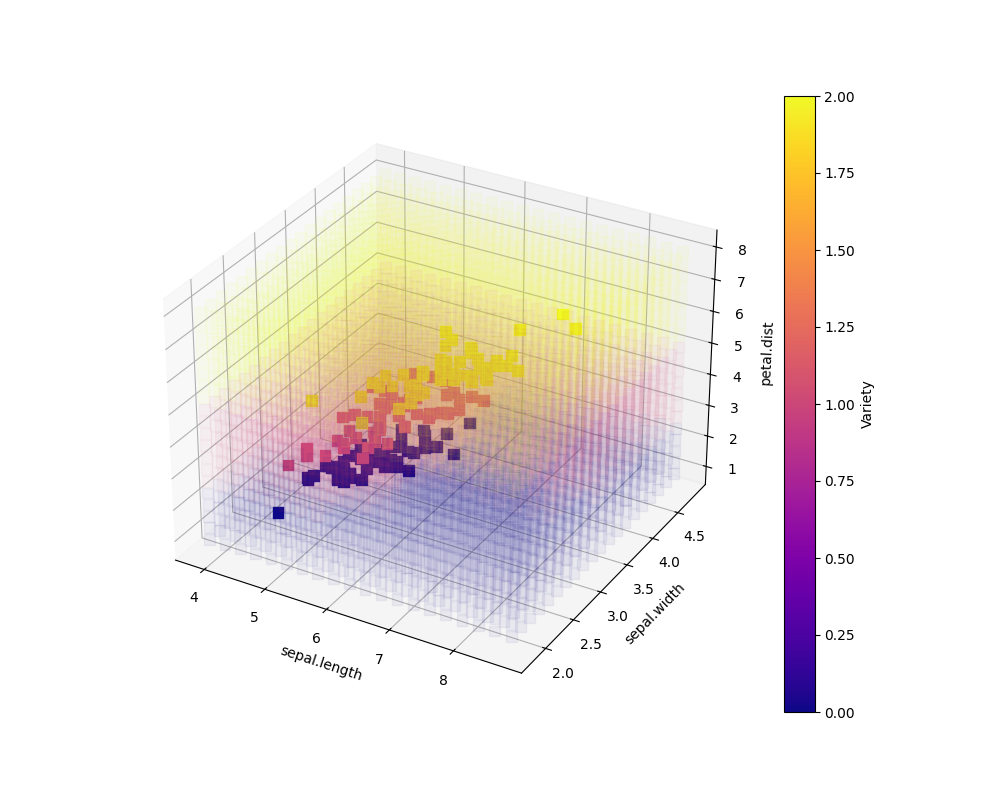

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
SCALE = 60
CMAP = 'plasma'

px = df['sepal.length']
qx = df['sepal.width']
rx = df['petal.dist']
tx = df['variety']
tx = tx.map(d)

PX, QX, RX = np.meshgrid(p,q,r)
TX = np.array(a)


scatter= ax.scatter(px, qx, rx, s=SCALE, c=tx, 
                    cmap=CMAP, alpha=1,
                    marker='s')
ax.scatter(PX, QX, RX, s=SCALE, c=TX,
           cmap=CMAP, alpha=0.05,
           marker='s')

ax.set_xlabel("sepal.length")
ax.set_ylabel("sepal.width")
ax.set_zlabel("petal.dist")

    # Add a colorbar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Variety')

plt.show()